<style>
    body { font-family: 'Comic Sans MS', cursive, sans-serif;
    }

</style>



# Check simulations from Jonas - Sybill2.3c

['dnn_axis', 'dnn_core', 'dnn_energy', 'dnn_xmax', 'event_id', 'auger_id', 'sd_id', 'is_saturated', 'core', 'axis', 'energy', 'xmax', 'element', 'mass', 'merit', 'fd_energy', 'fd_axis', 'sd_energy', 'sd_axis', 'sd_galactic_latitude', 'sd_galactic_longitude', 'sd_core', 'univ_energy', 'univ_axis', 'delta_mean_delta', 'delta_xmax', 'delta_energy', 'muon_number']
443543
dict_keys(['dnn_axis', 'dnn_core', 'dnn_energy', 'dnn_xmax', 'event_id', 'auger_id', 'sd_id', 'is_saturated', 'core', 'axis', 'energy', 'xmax', 'element', 'mass', 'merit', 'fd_energy', 'fd_axis', 'sd_energy', 'sd_axis', 'sd_galactic_latitude', 'sd_galactic_longitude', 'sd_core', 'univ_energy', 'univ_axis', 'delta_mean_delta', 'delta_xmax', 'delta_energy', 'muon_number'])
443543


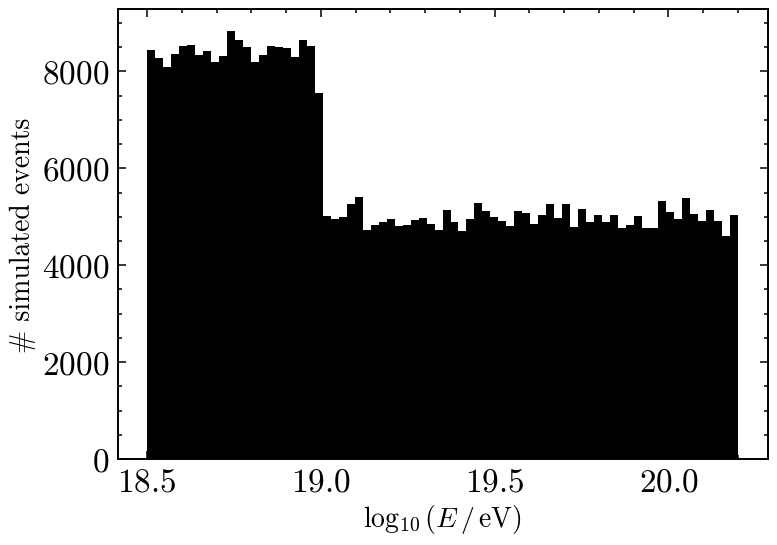

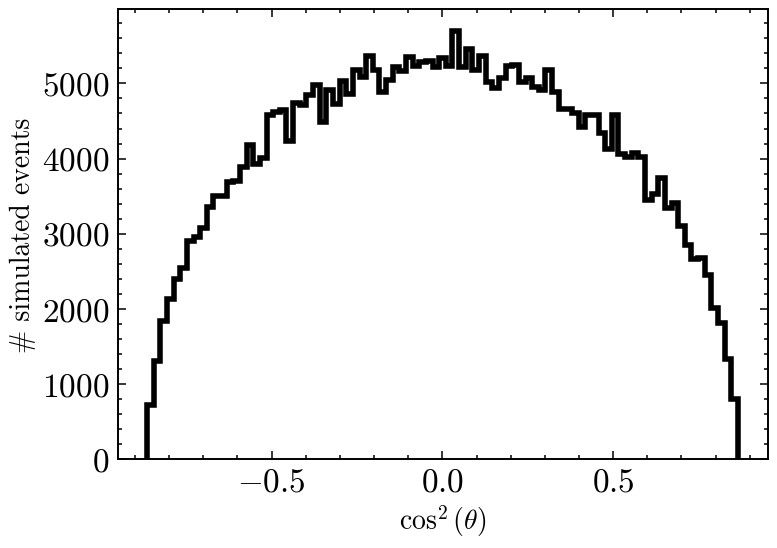

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mass_fractions import *
from simulated_dipole import *


# plt.rcParams["mathtext.fontset"] = "custom"
# plt.rcParams["mathtext.rm"] = "Comic Sans MS"
# plt.rcParams["mathtext.it"] = "Comic Sans MS:italic"
# plt.rcParams["mathtext.bf"] = "Comic Sans MS:bold"


input_path = '/mnt/c/Users/paolo/Desktop/LAVORO/data_files/aixnet_sib_all_data.npz'
data = np.load(input_path, allow_pickle=True)

print(data.files)
print(len(data['dnn_xmax']))

dd = {key: data[key] for key in data.files}

print(dd.keys())

print(len(dd['energy']))

plt.figure(figsize=(10,6))
# plt.hist(np.log10(dd['energy'][dd['mass']!=6]*1e18), color='k')
plt.hist(np.log10(dd['energy']*1e18), color='k')
# plt.plot(bin_centers, hist_2, color='k', linewidth=4)
plt.xlabel(r'$\log_{10}(E\,/\,\mathrm{eV})$')
plt.ylabel(r'# simulated events')
#plt.xscale('log')
#plt.yscale('log')
plt.show()


data_mask = flatten_distr(dd['energy'])
dd = dict_cutter(dd, data_mask)
# print(dd.items())

plt.figure(figsize=(10,6))
plt.hist(dd['axis'][:, 0], color='k', histtype='step', lw=4)
plt.xlabel(r'$\cos^2(\theta)$')
plt.ylabel(r'# simulated events')
plt.show()

<>:49: SyntaxWarning: invalid escape sequence '\ '
<>:49: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_41881/3757770761.py:49: SyntaxWarning: invalid escape sequence '\ '
  plt.fill_between(np.log10(xx), 0, es.spectrum_func(8e18)*8e18, color='blue' ,label='new accept-reject box',  ec='None', alpha=0.5, hatch=' \ ')


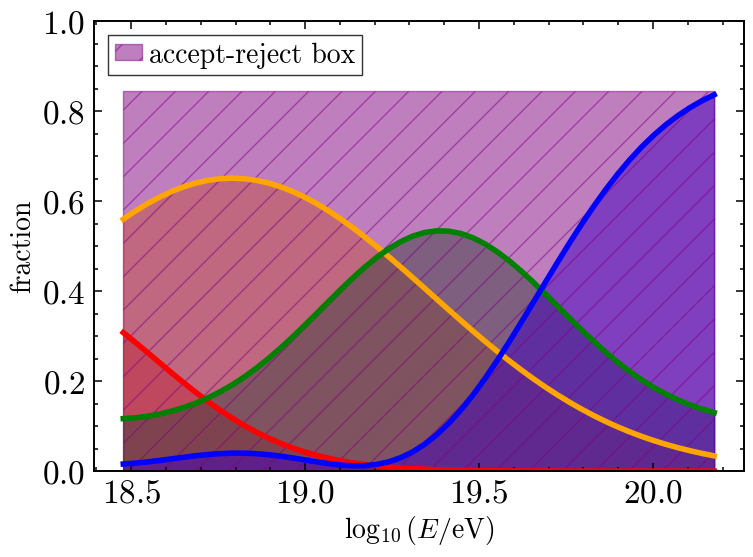

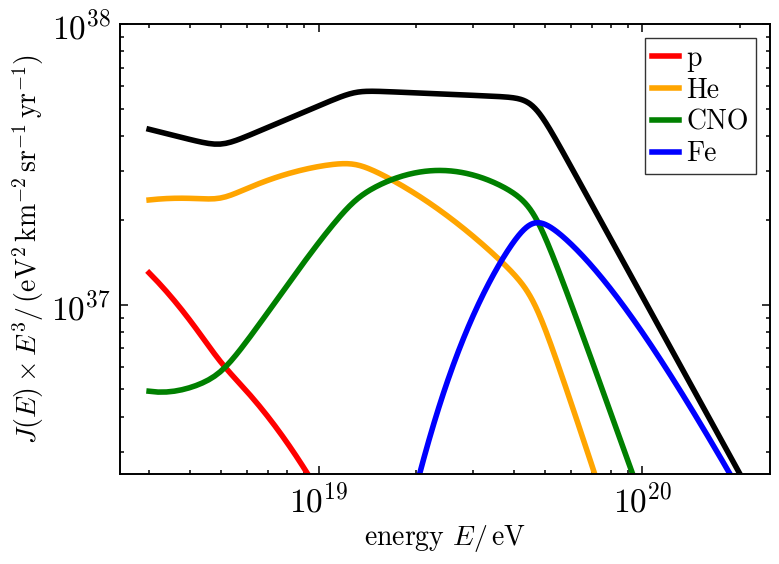

/tmp/ipykernel_41881/3757770761.py:49: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  plt.fill_between(np.log10(xx), 0, es.spectrum_func(8e18)*8e18, color='blue' ,label='new accept-reject box',  ec='None', alpha=0.5, hatch=' \ ')


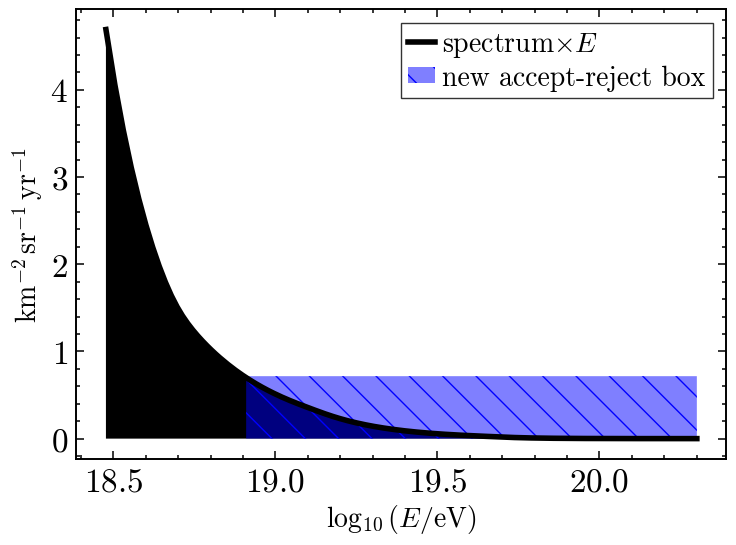

In [24]:
mf = mass_fractions()
ene = np.linspace(np.log10(3e18),np.log10(150e18))

plt.figure(figsize=(10,6))
for name in names:
    if name == 'Fe':
        plt.plot(ene, 1 - (mf.fraction_func('p', ene) + mf.fraction_func('He', ene) + mf.fraction_func('CNO', ene)), linewidth=4, color=colors[name])
        plt.fill_between(ene, 0, 1 - (mf.fraction_func('p', ene) + mf.fraction_func('He', ene) + mf.fraction_func('CNO', ene)), alpha=0.5, color=colors[name])
    else:    
        plt.plot(ene, mf.fraction_func(name, ene), linewidth=4, color=colors[name])
        plt.fill_between(ene, 0, mf.fraction_func(name, ene), alpha=0.5, color=colors[name])
# plt.hlines(0.845, np.min(ene), np.max(ene), color='purple', linewidth=4, ls='--')
# plt.hlines(0, np.min(ene), np.max(ene), color='purple', linewidth=4, ls='--')
plt.fill_between(ene, 0, 0.845, alpha=0.5, hatch="/", ec='None', color='purple',  label='accept-reject box')
plt.xlabel(r'$\log_{10}(E/\mathrm{eV})$')
plt.ylabel('fraction')
# plt.title('Mass fractions in the Auger standard mix')
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.show()

es = energy_spectrum()
ene2 = np.linspace((3e18),(200e18), 1000)
ene3 = np.log10(ene2)

plt.figure(figsize=(10,6))
for name in names:
    if name == 'Fe':
        func = es.spectrum_func(ene2)*np.power(ene2, 3)*(1 - (mf.fraction_func('p', ene3) + mf.fraction_func('He', ene3) + mf.fraction_func('CNO', ene3)))
        plt.plot(ene2, func, label=f'{name}', linewidth=4, color=colors[name])
    else:
        func = es.spectrum_func(ene2)*np.power(ene2, 3)*mf.fraction_func(name, ene3)    
        plt.plot(ene2, func, label=f'{name}', linewidth=4, color=colors[name])
plt.plot(ene2, es.spectrum_func(ene2)*np.power(ene2, 3), color='k', linewidth=4)
plt.xlabel(r'energy $E / \, \mathrm{eV}$')
plt.ylabel(r'$J(E)\times E^3 / \, \mathrm{(eV^2\, km^{-2} \, sr^{-1} \, yr^{-1})}$')
# plt.title('Energy spectrum')
plt.xscale('log')
plt.yscale('log')
plt.ylim(np.min(es.spectrum_func(ene2)*np.power(ene2, 3)), 1e38)
plt.legend()
plt.show()


xx = ene2[ene2>8e18]
plt.figure(figsize=(10,6))
plt.plot(np.log10(ene2), es.spectrum_func(ene2)*ene2, color='k', linewidth=4, label=r'spectrum$\times E$')
plt.fill_between(np.log10(ene2), 0, es.spectrum_func(ene2)*ene2, color='k', ec='None')
plt.fill_between(np.log10(xx), 0, es.spectrum_func(8e18)*8e18, color='blue' ,label='new accept-reject box',  ec='None', alpha=0.5, hatch=' \ ')
# plt.hlines(np.max(es.spectrum_func(ene2)*ene2), np.log10(np.min(ene2)), np.log10(np.max(ene2)), color='purple', linewidth=4, ls='--')
# plt.hlines(np.min(es.spectrum_func(ene2)*ene2),  np.log10(np.min(ene2)), np.log10(np.max(ene2)), color='purple', linewidth=4, ls='--')
# plt.fill_between(np.log10(ene2), np.min(es.spectrum_func(ene2)*ene2), np.max(es.spectrum_func(ene2)*ene2), alpha=0.5, hatch="/", ec='None', color='purple', label='accept-reject box')
plt.xlabel(r'$\log_{10}(E/\mathrm{eV})$')
plt.ylabel(r'$\mathrm{km^{-2} \, sr^{-1} \, yr^{-1}}$')
# plt.title('Energy spectrum')
#plt.xscale('log')
#plt.yscale('log')
# plt.ylim(np.min(es.spectrum_func(ene2)*np.power(ene2, 3)), 1e38)
plt.legend(loc='upper right')
plt.show()

369514
158.47699


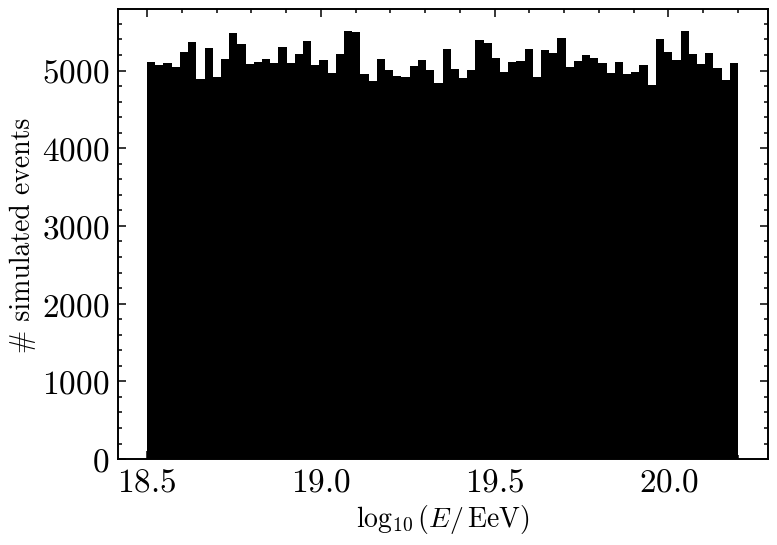

In [25]:
print(len(dd['energy']))
print(np.max(dd['energy']))

plt.figure(figsize=(10,6))
# plt.hist(np.log10(dd['energy'][dd['mass']!=6]*1e18), color='k')
plt.hist(np.log10(dd['energy']*1e18), color='k')
# plt.plot(bin_centers, hist_2, color='k', linewidth=4)
plt.xlabel(r'$\log_{10}(E/\, \mathrm{EeV})$')
plt.ylabel(r'# simulated events')
#plt.xscale('log')
#plt.yscale('log')
plt.show()


In [26]:
# first I extract the spectrum, then the mass distribution
mass_mask = mf.extract_all_fractions(np.log10(dd['energy']*1e18), dd['mass'])
#display(mass_mask)
dd = dict_cutter(dd, mass_mask)

108807


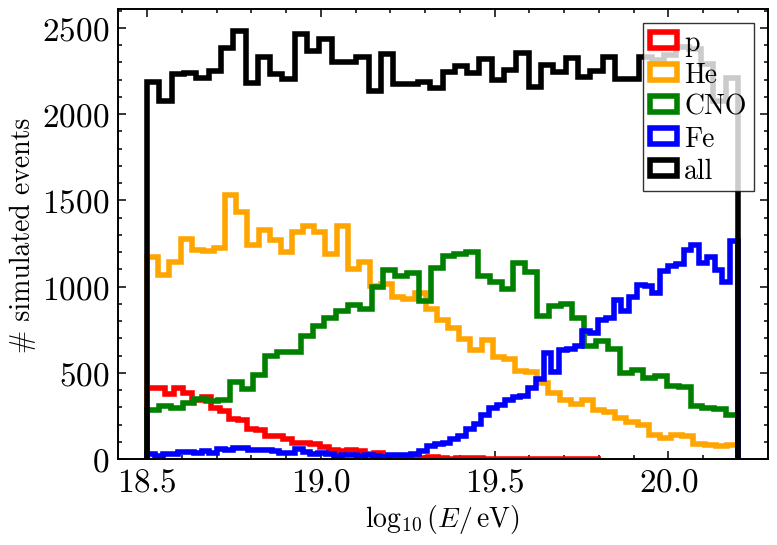

In [27]:
print(len(dd['energy']))

plt.figure(figsize=(10,6)) 
for name in names:
    plt.hist(np.log10(dd['energy'][dd['mass']==names[name]]*1e18), histtype='step', fill=False, lw=4, color=colors[name], label=f'{name}')
plt.hist(np.log10(dd['energy']*1e18), histtype='step', stacked=False, fill=False, color='k', lw=4, label='all')
plt.xlabel(r'$\log_{10}(E/\, \mathrm{eV})$')
plt.ylabel(r'# simulated events')
plt.legend()
plt.show()

In [28]:
energy_mask = (dd['energy']>8)
dd = dict_cutter(dd, energy_mask)

spectrum_mask = es.spectrum_fraction(dd['energy']*1e18)
dd = dict_cutter(dd, spectrum_mask)

16028
[7.94328235e+18 1.03344106e+19 1.34453288e+19 1.74927119e+19
 2.27584593e+19 2.96093294e+19 3.85224842e+19 5.01187234e+19
 6.52057229e+19 8.48342898e+19 1.10371550e+20 1.43596170e+20
 1.86822238e+20 2.43060443e+20 3.16227766e+20]


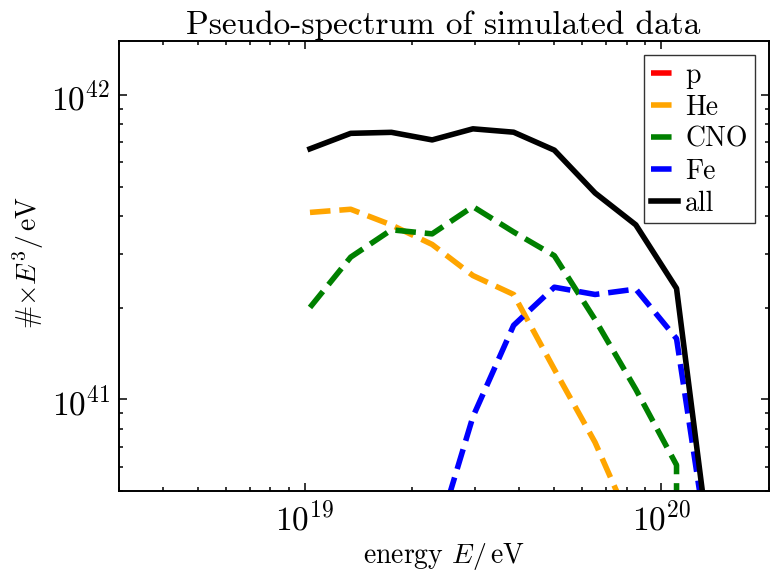

In [34]:
print(len(dd['auger_id']))


n_bins = int(np.log2(len(dd['auger_id'])) + 1)
bins = np.logspace(18.9, 20.5, n_bins+1)
print(bins)
bin_idx = np.digitize(dd['energy']*1e18, bins)-1
bin_centers = (bins[1:])
hist, _ = np.histogram(dd['energy']*1e18, bins=bins)
hist_2 = hist*np.power(bin_centers, 2)
# I use 2 as the power because the distribution has already lost one energy order with the use of log bins

plt.figure(figsize=(10,6))
plt.title('Pseudo-spectrum of simulated data')
for name in names:
    hist, _ = np.histogram(dd['energy'][dd['mass']==names[name]]*1e18, bins=bins)
    hist_3 = hist*np.power(bin_centers, 2)
    plt.plot(bin_centers, hist_3, color=colors[name], lw=4, ls='--', label=f'{name}')
plt.plot(bin_centers, hist_2, color='k', linewidth=4, label='all')
plt.ylabel(r' #$ \times E^3 / \, \mathrm{eV}$')
plt.xlabel(r'energy $E / \, \mathrm{eV}$')
plt.ylim(5e40, 1.5e42)
plt.xlim(3e18, 200e18)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

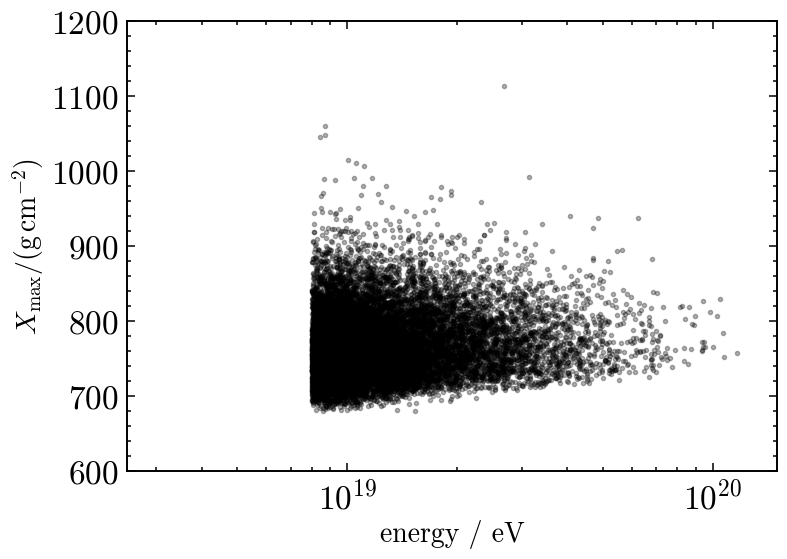

In [30]:
plt.figure(figsize=(10,6))
#plt.title('Simulated data')
plt.scatter(dd['energy']*1e18, dd['dnn_xmax'], alpha=0.3, color='k')
plt.xlabel(r'energy / eV')
plt.ylabel(r'$X_\mathrm{max} / \mathrm{(g \, cm^{-2})}$')
plt.xscale('log')
plt.ylim(600, 1200)
plt.xlim(2.5e18, 150e18)
plt.show()


np.save('simulated_data.npy', dd)

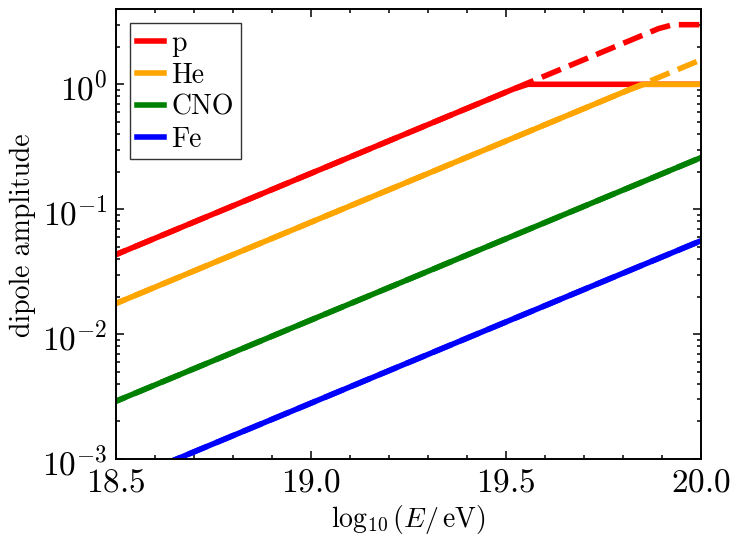

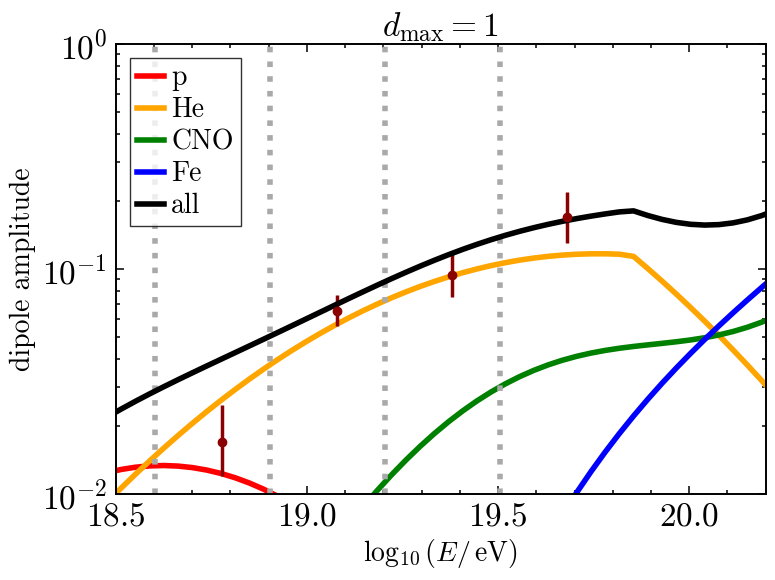

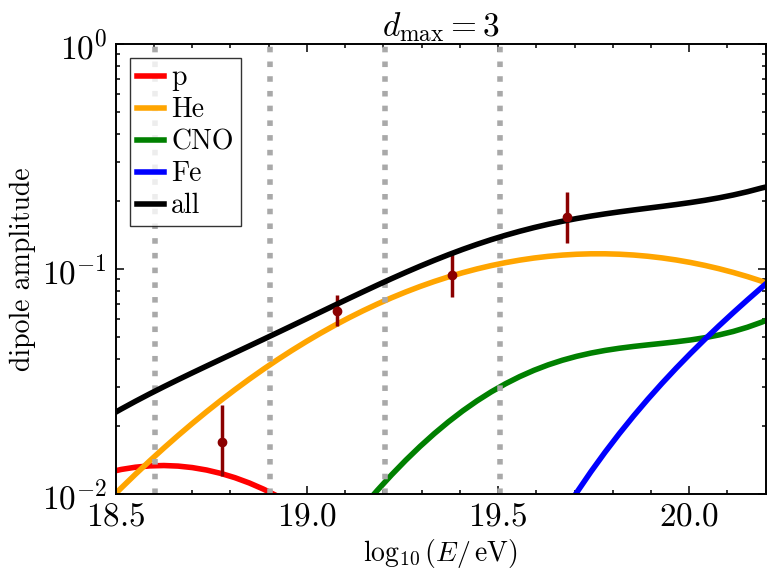

[6.0e+18 1.2e+19 2.4e+19 4.8e+19]


In [31]:
dip = simulated_dipole()
ene = np.linspace(np.log10(3e18),np.log10(200e18))
# pene = np.linspace(np.log10(3e18))
# print(ene)

plt.figure(figsize=(9,6))
for name in names:
    plt.plot(ene, dip.dipole_dependence(name, np.power(10, ene - 18), 1), label=f'{name}', linewidth=4, color=colors[name])
    plt.plot(ene, dip.dipole_dependence(name, np.power(10, ene - 18), 3), ls='--', linewidth=4, color=colors[name])

plt.xlabel(r'$\log_{10}(E/\, \mathrm{eV})$')
plt.ylabel('dipole amplitude')
plt.ylim(1e-3, 4)
plt.xlim(18.5, 20)
plt.yscale('log')
plt.legend()
plt.show()


dtot = np.zeros_like(ene)

plt.figure(figsize=(10,6))
plt.title(r'$d_\mathrm{max}=1$')
for name in names:
    if name == 'Fe':
        ddd = dip.dipole_dependence(name, np.power(10, ene - 18), 1)*(1 - (mf.fraction_func('p', ene) + mf.fraction_func('He', ene) + mf.fraction_func('CNO', ene)))
        plt.plot(ene, ddd, label=f'{name}', linewidth=4, color=colors[name])
        dtot += ddd
    else:
        ddd = dip.dipole_dependence(name, np.power(10, ene - 18), 1)*mf.fraction_func(name, ene)
        plt.plot(ene, ddd, label=f'{name}', linewidth=4, color=colors[name])
        dtot += ddd
for i in range(len(energies[:-1])):
    E = energies[i]
    Eplus = energies[i+1]
    plt.axvline(np.log10(E), lw=4, color='darkgrey', ls=':')
    # emask = (ene>=np.log10(E))&(ene<np.log10(Eplus))
    # plt.plot(ene[emask], dip.overall_dipole_dependence(10**(ene[emask]-18)), lw=4, color='grey')
plt.errorbar(np.log10(1.5*mid_ene), dipole_values, yerr=dipole_errors, ls='', marker='o', color='darkred')
plt.plot(ene, dtot, label='all', linewidth=4, color='k')
plt.xlabel(r'$\log_{10}(E/\, \mathrm{eV})$')
plt.ylabel('dipole amplitude')
plt.ylim(1e-2, 1)
plt.xlim(18.5, 20.2)
plt.yscale('log')
plt.legend(loc='upper left')
plt.show() 


dtot = np.zeros_like(ene)

plt.figure(figsize=(10,6))
plt.title(r'$d_\mathrm{max}=3$')
for name in names:
    if name == 'Fe':
        ddd = dip.dipole_dependence(name, np.power(10, ene - 18), 3)*(1 - (mf.fraction_func('p', ene) + mf.fraction_func('He', ene) + mf.fraction_func('CNO', ene)))
        plt.plot(ene, ddd, label=f'{name}', linewidth=4, color=colors[name])
        dtot += ddd
    else:
        ddd = dip.dipole_dependence(name, np.power(10, ene - 18), 3)*mf.fraction_func(name, ene)
        plt.plot(ene, ddd, label=f'{name}', linewidth=4, color=colors[name])
        dtot += ddd
for i in range(len(energies[:-1])):
    E = energies[i]
    Eplus = energies[i+1]
    plt.axvline(np.log10(E), lw=4, color='darkgrey', ls=':')
plt.errorbar(np.log10(1.5*mid_ene), dipole_values, yerr=dipole_errors, ls='', marker='o', color='darkred')
plt.plot(ene, dtot, label='all', linewidth=4, color='k')
plt.xlabel(r'$\log_{10}(E/\, \mathrm{eV})$')
plt.ylabel('dipole amplitude')
plt.ylim(1e-2, 1)
plt.xlim(18.5, 20.2)
plt.yscale('log')
plt.legend(loc='upper left')
plt.show()

print(1.5*mid_ene)